# Image Segmentation Using a Clustering Technique (KMeans)

The clustering techniques allow the data (pixels) to form groups or clusters based on similarity. **KMeans**, in particular, calculates the average of all data points per cluster to estimate a prototype that will represent the cluster characteristics.

In this application, we reconstruct an image with a given number of clusters, in other words, colors.

In [ ]:
import cv2   # OpenCV for image processing tasks.
import matplotlib.pyplot as plt  # for plotting and displaying images.
import numpy as np  # for numerical operations, especially array manipulation.

from sklearn.cluster import KMeans

OpenCV loads images in BGR format, so cv2.cvtColor is used to convert it to RGB format, which is standard for matplotlib and many other image processing libraries.

In [ ]:
image = cv2.cvtColor(cv2.imread("1.png"), cv2.COLOR_BGR2RGB)
image.shape

(1080, 1920, 3)

Display the original image using matplotlib.

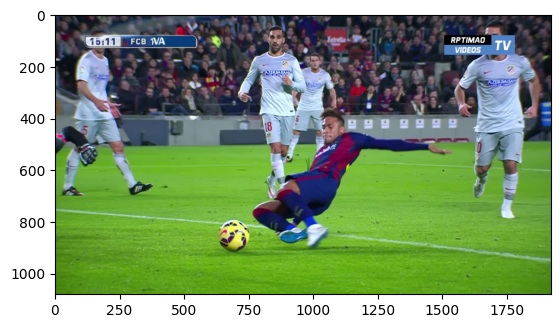

In [ ]:
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

**Elbow Method**
This method is a heuristic used in determining the optimal number of clusters for a given dataset, particularly in K-Means clustering.

- **How it works**: You run the K-Means algorithm for a range of different k values (number of clusters), and for each k, you calculate the Within-Cluster Sum of Squares (WCSS), also known as inertia. WCSS measures the sum of squared distances between each point and the centroid of its assigned cluster.
- **What to look for**: When you plot the inertia against the number of clusters (k), the plot typically looks like an arm. As k increases, the inertia generally decreases because points are closer to their own cluster centroids.
- **The "Elbow"**: The "elbow" point is where the rate of decrease in inertia sharply changes or "bends." This point is often considered the optimal k.

In [7]:
def elbow_method(X, k_min=1, k_max=10):
    inertia = {}
    for k in range(k_min, k_max+1):
        print(k)
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia[k] = kmeans.inertia_

    plt.figure()
    plt.plot(inertia.keys(), inertia.values())
    plt.ylabel("Inertia")
    plt.xlabel("Number of cl√∫sters")
    plt.show()

    return inertia

1
2
3
4
5
6
7
8
9
10


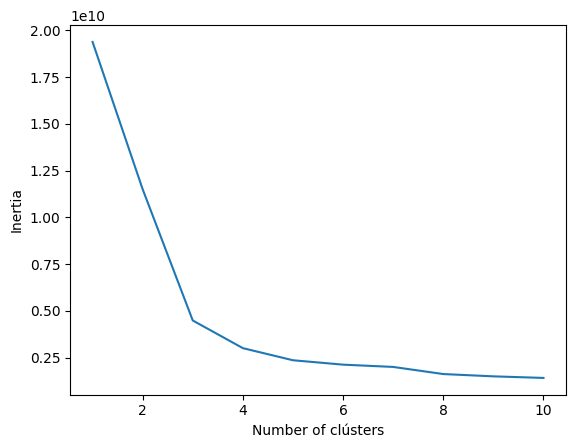

In [8]:
processed_image = image.reshape(-1, 3)
inertia = elbow_method(processed_image, k_min=1, k_max=10)

## Using 3 clusters as suggested by the elbow plot.

In [12]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
predicted_image = kmeans3.fit_predict(processed_image)
predicted_image.shape

(2073600,)

In [18]:
reshaped_predicted_image = predicted_image.reshape((1080, 1920))
centroids3 = kmeans3.cluster_centers_ / 255

Let's visualize the original and reconstructed images side-to-side.

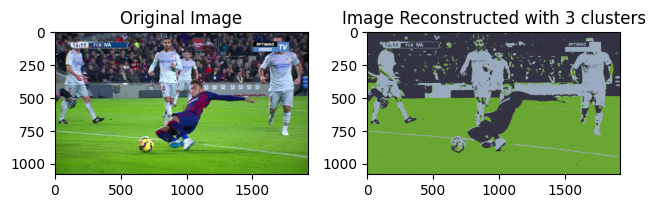

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(image)
ax2.imshow(centroids3[reshaped_predicted_image])

ax1.set_title("Original Image")
ax2.set_title("Image Reconstructed with 3 clusters")

plt.tight_layout()
plt.show()

We see the main shapes and objects of the image are preserved, but their colors have been averaged to only three main values.

2
3
4
5
6
7
8
9
10


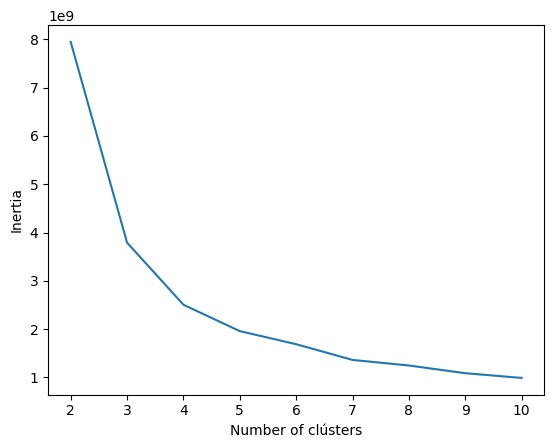

In [23]:
## Using a second image
image = cv2.imread("1004.jpg")
processed_image = image.reshape(-1, 3)
inertia = elbow_method(processed_image, k_min=2, k_max=10)

<Figure size 1000x800 with 0 Axes>

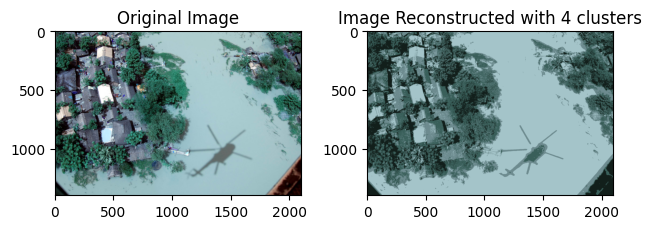

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
predicted_image = kmeans.fit_predict(processed_image)

reshaped_predicted_image = predicted_image.reshape((image.shape[0], image.shape[1]))
centroids4 = kmeans.cluster_centers_ / 255

plt.figure(figsize=(10, 8))
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(image)
ax2.imshow(centroids4[reshaped_predicted_image])
ax1.set_title("Original Image")
ax2.set_title("Image Reconstructed with 4 clusters")
plt.tight_layout()
plt.show()